# 신경망 학습

## 단순한 신경망 구현 : Logic Gate

### 필요한 모듈 import

In [55]:
import numpy as np
import matplotlib.pyplot as plt

### 하이퍼 파라미터(Hyper Parameter)

In [56]:
epochs = 1000
lr = 0.1

### 유틸 함수들(Util Functions)

In [57]:
def sigmoid(x):
    return 1/ (1+(np.exp(-x)))

def mean_squared_error(pred_y, true_y):
    return 0.5 * (np.sum(true_y - pred_y)**2)

def cross_entropy_error(pred_y, true_y):
    if true_y.ndim == 1:
            true_y = true_y.reshape(1, -1)
            pred_y = pred_y.reshape(1, -1)
            
    delta = 1e-7
    batch_size = pred_y.shape[0]
    return -np.sum(true_y * np.log(pred_y + delta))

def cross_entropy_error_for_binary(pred_y, true_y):
    return 0.5 * np.sum((-true_y * np.log(pred_y)) - (1 - true_y) * np.log(1-pred_y))

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

def differential(f, x):
    eps = 1e-5
    diff_value = np.zeros_like(x)

    for i in range(x.shape[0]):
        temp_val = x[i]

        x[i] = temp_val + eps
        f_h1 = f(x)

        x[i] = temp_val -eps
        f_h2 = f(x)

        diff_value[i] = (f_h1 - f_h2) / (2 *eps)
    
    return diff_value

### 신경망

In [58]:
class Logic_GateNet():
    
    def __init__(self):
        def weight_init():
            np.random.seed(1)
            weights = np.random.randn(2)
            bias = np.random.rand(1)

            return weights, bias

        self.weights, self.bias = weight_init()

    def predict(self, x):
        W = self.weights.reshape(-1, 1)
        b = self.bias

        pred_y = sigmoid(np.dot(x, W) + b)
        return pred_y

    def loss(self, x, true_y):
        pred_y = self.predict(x)
        return cross_entropy_error_for_binary(pred_y, true_y)

    def get_gradient(self, x, t):
        def loss_grad(grad):
            return self.loss(x,t)

        grad_W = differential(loss_grad, self.weights)
        grad_B = differential(loss_grad, self.bias)

        return grad_W, grad_B

### AND Gate

#### 모델 생성 및 학습

In [59]:
AND = Logic_GateNet()

X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0],[0],[0],[1]])

train_loss_list = list()

for i in range(epochs):
    grad_W, grad_B = AND.get_gradient(X,Y)

    AND.weights -= lr * grad_W
    AND.bias -= lr * grad_B

    loss = AND.loss(X, Y)
    train_loss_list.append(loss)

    if i % 100 == 99:
        print("Epoch: {}, Cost: {}, Weights: {}, Bias: {}".format(i+1, loss, AND.weights, AND.bias))

Epoch: 100, Cost: 0.6886987628481974, Weights: [1.56402489 0.79138771], Bias: [-2.14869146]
Epoch: 200, Cost: 0.4946922802317477, Weights: [2.01325161 1.71200974], Bias: [-3.07879437]
Epoch: 300, Cost: 0.3920743574668242, Weights: [2.42795372 2.29704769], Bias: [-3.79078865]
Epoch: 400, Cost: 0.32578054730407047, Weights: [2.79428901 2.73178113], Bias: [-4.37224115]
Epoch: 500, Cost: 0.2786958490593001, Weights: [3.11570431 3.08342195], Bias: [-4.86530315]
Epoch: 600, Cost: 0.24334520782392294, Weights: [3.39940551 3.38161091], Bias: [-5.29385366]
Epoch: 700, Cost: 0.21578560009051095, Weights: [3.65216893 3.64181093], Bias: [-5.67294341]
Epoch: 800, Cost: 0.1936925965478115, Weights: [3.87951811 3.87320526], Bias: [-6.01277885]
Epoch: 900, Cost: 0.1755921064307146, Weights: [4.08579293 4.08179208], Bias: [-6.32065064]
Epoch: 1000, Cost: 0.16049901156404384, Weights: [4.27438859 4.27176665], Bias: [-6.60197109]


#### 테스트

In [60]:
print(AND.predict(X))

[[0.00135585]
 [0.08865214]
 [0.08886421]
 [0.8748111 ]]


### OR Gate

#### 모델 생성 및 학습

In [61]:
OR = Logic_GateNet()
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y_2 = np.array([[0],[1],[1],[1]])

train_loss_list = list()

for i in range(epochs):
    grad_W, grad_B = OR.get_gradient(X, Y_2)

    OR.weights -= lr * grad_W
    OR.bias -= lr * grad_B

    loss = OR.loss(X, Y_2)
    train_loss_list.append(loss)
    
    if i % 100 == 99:
        print("Epoch: {}, Cost: {}, Weights: {}, Bias: {}".format(i+1, loss, OR.weights, OR.bias))

Epoch: 100, Cost: 0.4958958049609248, Weights: [2.45419153 1.40520415], Bias: [-0.14450602]
Epoch: 200, Cost: 0.3399910052303018, Weights: [2.98517793 2.39365315], Bias: [-0.67661248]
Epoch: 300, Cost: 0.2574778683612523, Weights: [3.44860944 3.08310291], Bias: [-1.03712038]
Epoch: 400, Cost: 0.20645212636378812, Weights: [3.85036309 3.60706913], Bias: [-1.30581039]
Epoch: 500, Cost: 0.17181024582382054, Weights: [4.19965722 4.02803989], Bias: [-1.5203541]
Epoch: 600, Cost: 0.14680779380912212, Weights: [4.50602003 4.37937212], Bias: [-1.69913028]
Epoch: 700, Cost: 0.1279564839577935, Weights: [4.77748492 4.68063256], Bias: [-1.85239584]
Epoch: 800, Cost: 0.11326452414385635, Weights: [5.02041415 4.94419703], Bias: [-1.9864936]
Epoch: 900, Cost: 0.10151135599420945, Weights: [5.23976713 5.17836955], Bias: [-2.10564229]
Epoch: 1000, Cost: 0.09190796448458385, Weights: [5.43941599 5.38898714], Bias: [-2.21280016]


#### 테스트

In [62]:
print(OR.predict(X))

[[0.0986069 ]
 [0.95992825]
 [0.96182368]
 [0.99981878]]


### NAND Gate

#### 모델 생성 및 학습

In [63]:
NAND = Logic_GateNet()

X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y_3 = np.array([[1],[1],[1],[0]])

train_loss_list = list()

for i in range(epochs):
    grad_W, grad_B = NAND.get_gradient(X,Y_3)

    NAND.weights -= lr * grad_W
    NAND.bias -= lr * grad_B

    loss = NAND.loss(X, Y_3)
    train_loss_list.append(loss)

    if i % 100 == 99:
        print("Epoch: {}, Cost: {}, Weights: {}, Bias: {}".format(i+1, loss, NAND.weights, NAND.bias))

Epoch: 100, Cost: 0.7911124259396919, Weights: [-0.49003662 -1.25822733], Bias: [1.74569496]
Epoch: 200, Cost: 0.5429873559716376, Weights: [-1.51585766 -1.80296112], Bias: [2.79167048]
Epoch: 300, Cost: 0.4211974656990432, Weights: [-2.14663639 -2.26687089], Bias: [3.56530812]
Epoch: 400, Cost: 0.3455498971544839, Weights: [-2.60790032 -2.66357416], Bias: [4.18554164]
Epoch: 500, Cost: 0.29306800971562547, Weights: [-2.97762276 -3.00565182], Bias: [4.70569391]
Epoch: 600, Cost: 0.25427794229993145, Weights: [-3.28924936 -3.30437381], Bias: [5.1544371]
Epoch: 700, Cost: 0.2243776808459012, Weights: [-3.55994902 -3.56859574], Bias: [5.54924485]
Epoch: 800, Cost: 0.2006150644393949, Weights: [-3.79981845 -3.8050078 ], Bias: [5.90170075]
Epoch: 900, Cost: 0.18128040519830899, Weights: [-4.01540776 -4.01865291], Bias: [6.21994667]
Epoch: 1000, Cost: 0.16524895980992177, Weights: [-4.21127349 -4.21337527], Bias: [6.50995438]


#### 테스트

In [64]:
print(NAND.predict(X))

[[0.99851366]
 [0.90859333]
 [0.90876773]
 [0.12845438]]


### XOR Gate

#### 모델 생성 및 학습

In [65]:
XOR = Logic_GateNet()

X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y_4 = np.array([[0],[1],[1],[0]])

train_loss_list = list()

for i in range(epochs):
    grad_W, grad_B = XOR.get_gradient(X,Y_4)

    XOR.weights -= lr * grad_W
    XOR.bias -= lr * grad_B

    loss = XOR.loss(X, Y_4)
    train_loss_list.append(loss)

    if i % 100 == 99:
        print("Epoch: {}, Cost: {}, Weights: {}, Bias: {}".format(i+1, loss, XOR.weights, XOR.bias))

Epoch: 100, Cost: 1.4026786384666137, Weights: [ 0.46985501 -0.19958026], Bias: [-0.16093055]
Epoch: 200, Cost: 1.3879402830296645, Weights: [ 0.15692157 -0.03421502], Bias: [-0.07306565]
Epoch: 300, Cost: 1.38648983866543, Weights: [0.05486233 0.0005171 ], Bias: [-0.03311222]
Epoch: 400, Cost: 1.3863225886766086, Weights: [0.02009022 0.00464887], Bias: [-0.01493932]
Epoch: 500, Cost: 1.3862990114902494, Weights: [0.00759143 0.00320927], Bias: [-0.00667283]
Epoch: 600, Cost: 1.3862951472088905, Weights: [0.00284948 0.00161098], Bias: [-0.00291262]
Epoch: 700, Cost: 1.3862944853452563, Weights: [0.00096069 0.00061579], Bias: [-0.00120221]
Epoch: 800, Cost: 1.3862943848646831, Weights: [1.77758040e-04 8.68769146e-05], Bias: [-0.0004242]
Epoch: 900, Cost: 1.3862943785413158, Weights: [-0.0001567  -0.00017538], Bias: [-7.02997741e-05]
Epoch: 1000, Cost: 1.386294383640712, Weights: [-0.00030268 -0.00030083], Bias: [9.06769007e-05]


#### 테스트

In [66]:
print(XOR.predict(X))

[[0.50002267]
 [0.49994746]
 [0.499947  ]
 [0.49987179]]


#### 2층 신경망으로 XOR 게이트 구현(1)

- 얕은 신경망, Shallow Neural Network

- 두 논리게이트(NAND, OR)를 통과하고  
  AND 게이트로 합쳐서 구현

- 06 신경망 구조 참고

In [67]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y_5 = np.array([[0],[1],[1],[0]])

s1 = NAND.predict(X)
s2 = OR.predict(X)
X_2 = np.array([s1, s2]).T.reshape(-1,2)

#### 테스트

In [68]:
print(AND.predict(X_2))

[[0.1286767 ]
 [0.79936003]
 [0.80077444]
 [0.14406688]]


#### 2층 신경망으로 XOR 게이트 구현(2)
- 클래스로 구현

In [69]:
class XORNet():
    
    def __init__(self):
        np.random.seed(1)

        def weight_init():
            params = {}
            params['w_1'] = np.random.randn(2)
            params['b_1'] = np.random.rand(2)
            params['w_2'] = np.random.randn(2)
            params['b_2'] = np.random.rand(2)
            return params
        
        self.params = weight_init()

    def predict(self, x):
        W_1, W_2 = self.params['w_1'].reshape(-1, 1), self.params['w_2'].reshape(-1, 1)
        B_1, B_2 = self.params['b_1'], self.params['b_2']
        
        A1 = np.dot(x, W_1) + B_1
        Z1 = sigmoid(A1)
        A2 = np.dot(Z1,W_2) + B_2
        pred_y = sigmoid(A2)

        return pred_y

    def loss(self, x, true_y):
        pred_y = self.predict(x)
        return cross_entropy_error_for_binary(pred_y, true_y)

    def get_gradient(self, x, t):
        def loss_grad(grad):
            return self.loss(x, t)

        grads ={}
        grads['w_1'] = differential(loss_grad, self.params['w_1'])
        grads['b_1'] = differential(loss_grad, self.params['b_1'])
        grads['w_2'] = differential(loss_grad, self.params['w_2'])
        grads['b_2'] = differential(loss_grad, self.params['b_2'])
        
        return grads

#### 하이퍼 파라미터(Hyper Parameter)
- 재조정

In [70]:
lr = 0.3

#### 모델 생성 및 학습

In [71]:
XOR = XORNet()
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y_5 = np.array([[0],[1],[1],[0]])

train_loss_list = list()

for i in range(epochs):
    grads =XOR.get_gradient(X, Y_5)

    for key in ('w_1', 'b_1', 'w_2', 'b_2'):
        XOR.params[key] -= lr * grads[key]

        loss = XOR.loss(X, Y_5)
        train_loss_list.append(loss)

        if i % 100 == 99:
            print("Epoch: {}, Cost: {}".format(i+1, loss))

Epoch: 100, Cost: 2.585909640501895
Epoch: 100, Cost: 2.5852074864235943
Epoch: 100, Cost: 2.5836759733080656
Epoch: 100, Cost: 2.5833633336169957
Epoch: 200, Cost: 0.6588289820436902
Epoch: 200, Cost: 0.6583203735170571
Epoch: 200, Cost: 0.652390680536987
Epoch: 200, Cost: 0.6517074396761213
Epoch: 300, Cost: 0.25183276924404263
Epoch: 300, Cost: 0.25177064238891833
Epoch: 300, Cost: 0.25068822482319797
Epoch: 300, Cost: 0.2504602632346608
Epoch: 400, Cost: 0.15018155190482163
Epoch: 400, Cost: 0.1501618047310399
Epoch: 400, Cost: 0.1497489243044297
Epoch: 400, Cost: 0.14965075200907407
Epoch: 500, Cost: 0.10599776462524572
Epoch: 500, Cost: 0.10598869467701219
Epoch: 500, Cost: 0.10577532840309056
Epoch: 500, Cost: 0.10572230825999189
Epoch: 600, Cost: 0.08159467276802451
Epoch: 600, Cost: 0.08158962653482503
Epoch: 600, Cost: 0.0814602261671057
Epoch: 600, Cost: 0.08142737846397785
Epoch: 700, Cost: 0.06620099755966835
Epoch: 700, Cost: 0.06619784171364412
Epoch: 700, Cost: 0.066111

#### 테스트

In [72]:
print(XOR.predict(X))

[[0.00845742 0.00845742]
 [0.98352814 0.98352814]
 [0.99160907 0.99160907]
 [0.00849318 0.00849318]]


## 다중 클래스 분류 : MNIST Dataset

### 배치 처리
- 학습 데이터 전체를 한번에 진행하지 않고  
  일부 데이터(샘플)을 확률적으로 구해서 조금씩 나누어 진행

- 확률적 경사 하강법(Stochastic Gradient Descent) 또는  
  미니 배치 학습법(mini-batch learning)이라고도 부름

#### 신경망 구현 : MNIST 

#### 필요한 모듈 임포트

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from tqdm.notebook import tqdm

#### 데이터 로드

In [74]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### 데이터 확인

In [75]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


(28, 28)


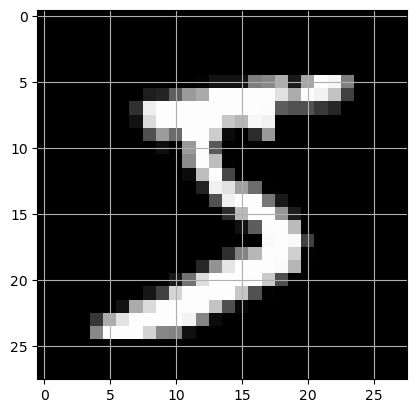

In [76]:
img = x_train[0]
print(img.shape)

plt.imshow(img, cmap='gray')
plt.grid()
plt.show()

In [77]:
y_train[0]

5

#### 데이터 전처리 (Data Preprocessing)

In [78]:
def flatten_for_mnist(x):
    temp = np.zeros((x.shape[0], x[0].size))

    for idx, data in enumerate(x):
        temp[idx, :] = data.flatten()
        
    return temp

In [79]:
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = flatten_for_mnist(x_train)
x_test = flatten_for_mnist(x_test)

print(x_train.shape)
print(x_test.shape)

y_train_ohe = tf.one_hot(y_train, depth=10).numpy()
y_test_ohe = tf.one_hot(y_test, depth=10).numpy()

print(y_train_ohe.shape)
print(y_test_ohe.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [80]:
print(x_train[0].max(), x_train[0].min())
print(y_train_ohe[0])

1.0 0.0
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#### 하이퍼 파라미터(Hyper Parameter)

In [81]:
epochs = 2
lr = 0.1
batch_size = 100
train_size = x_train.shape[0]

#### 사용되는 함수들(Util Functions)

In [85]:
def sigmoid(x):
    return 1/ (1+(np.exp(-x)))

def mean_squared_error(pred_y, true_y):
    return 0.5 * (np.sum(true_y - pred_y)**2)

def cross_entropy_error(pred_y, true_y):
    if true_y.ndim == 1:
            true_y = true_y.reshape(1, -1)
            pred_y = pred_y.reshape(1, -1)
            
    delta = 1e-7
    batch_size = pred_y.shape[0]
    return -np.sum(true_y * np.log(pred_y + delta))

def cross_entropy_error_for_binary(pred_y, true_y):
    return 0.5 * np.sum((-true_y * np.log(pred_y)) - (1 - true_y) * np.log(1-pred_y))

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

def differential_1d(f, x):
    eps = 1e-5
    diff_value = np.zeros_like(x)

    for i in range(x.shape[0]):
        temp_val = x[i]

        x[i] = temp_val + eps
        f_h1 = f(x)

        x[i] = temp_val -eps
        f_h2 = f(x)

        diff_value[i] = (f_h1 - f_h2) / (2 *eps)
    
    return diff_value

def differential_2d(f, X):
    if X.ndim == 1:
        return differential_1d(f,X)
    else:
        grad = np.zeros_like(X)
    
    for idx, x in enumerate(X):
        grad[idx] = differential_1d(f,x)

    return grad

#### 2층 신경망으로 구현

In [88]:
class MyModel():
    
    def __init__(self):
        
        def weight_init(input_nodes, hidden_nodes, output_units):
            np.random.seed(777) 
            params = {}
            params['w_1'] = 0.01 * np.random.randn(input_nodes, hidden_nodes)
            params['b_1'] = np.random.rand(hidden_nodes)
            params['w_2'] = 0.01 * np.random.randn(hidden_nodes, output_units)
            params['b_2'] = np.zeros(output_units)
            
            return params
            
        self.params = weight_init(784, 64, 10)

    def predict(self, x):
        W_1, W_2 = self.params['w_1'], self.params['w_2']
        B_1, B_2 = self.params['b_1'], self.params['b_2']
        
        A1 = np.dot(x, W_1) + B_1
        Z1 = sigmoid(A1)
        A2 = np.dot(Z1,W_2) + B_2
        pred_y = softmax(A2)

        return pred_y

    def loss(self, x, true_y):
        pred_y = self.predict(x)
        return cross_entropy_error_for_binary(pred_y, true_y)

    def accuracy(self, x, true_y):
        pred_y = self.predict(x)
        y_argmax = np.argmax(pred_y, axis=1)
        t_argmax = np.argmax(true_y, axis=1)
        
        accuracy = np.sum(y_argmax == t_argmax) / float(x.shape[0])
        return accuracy    
    
    
    def get_gradient(self, x, t):
        def loss_grad(grad):
            return self.loss(x, t)

        grads ={}
        grads['w_1'] = differential_2d(loss_grad, self.params['w_1'])
        grads['b_1'] = differential_2d(loss_grad, self.params['b_1'])
        grads['w_2'] = differential_2d(loss_grad, self.params['w_2'])
        grads['b_2'] = differential_2d(loss_grad, self.params['b_2'])
        
        return grads

#### 모델 생성 및 학습
- 시간 많이 소요

In [90]:
model = MyModel()

train_loss_list = list()
train_acc_list = list()
test_acc_list = list()
iter_per_epoch = max(train_size / batch_size, 1)

start_time = time.time()
for i in tqdm(range(epochs)):
    
    batch_idx = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_idx]
    y_batch = y_train_ohe[batch_idx]

    grads = model.get_gradient(x_batch, y_batch)
    
    for key in grads.keys():
        model.params[key] -= lr * grads[key]
        
    loss = model.loss(x_batch, y_batch)
    train_loss_list.append(loss)

    train_accuracy = model.accuracy(x_train, y_train_ohe)
    test_accuracy = model.accuracy(x_test, y_test_ohe)
    train_acc_list.append(train_accuracy)
    test_acc_list.append(test_accuracy)

    print("Epochs: {}, Cost: {}, Train Accuracy: {}, Test Accuray: {}".format(i+1, loss, train_accuracy, test_accuracy))

end_time = time.time()

print("총 학습 소요시간: {:.3f}s".format(end_time - start_time))

  0%|          | 0/2 [00:00<?, ?it/s]

Epochs: 1, Cost: 544.8502909912949, Train Accuracy: 0.0993, Test Accuray: 0.1032
Epochs: 2, Cost: 359.9811386321985, Train Accuracy: 0.09751666666666667, Test Accuray: 0.0974
총 학습 소요시간: 130.609s


### 모델의 결과
- 모델은 학습이 잘 될 수도, 잘 안될 수도 있음

- 만약, 학습이 잘 되지 않았다면,  
  학습이 잘 되기 위해서 어떠한 조치를 취해야 하는가?
  - 다양한 학습관련 기술이 존재